# Ausentismo y cobertura del personal de Enfermería 2023 y modelo de predicción - Sanatorio Los Arcos
<br>

## **Introducción**

### Swiss Medical Group es un grupo empresarial conformado por varias empresas. Una de ellas es Swiss Medical Medicina Prepaga, el cual integra verticalmente al adquirir progresivamente clínicas propias. Sanatorio Los Arcos se inaugura en el 2006, construyendo en 2012 un segundo edificio para ampliar su capacidad instalada y operativa. Dicho sanatorio fue el último que inauguró el grupo. 
### El servicio de Internación General del Sanatorio Los Arcos tiene una capacidad instalada de 150 camas distribuidos en 6 pisos (4° al 9° piso inclusive), ambos edificios. El plantel de Enfermería cuenta con una dotación de 204 colaboradores distribuidos en 5 turnos: turno mañana (TM) de 7 a 14 hs, turno tarde (TT) de 14 a 21 hs, turno noche A (TNA) y turno noche B (TNB) de 21 a 7 hs noche por medio, y fin de semana (SDF) de 7 a 21 hs sábados, domingos y feriados. 
### Internación General es un servicio polivalente que atiende pacientes clínicos, oncohematológicos y quirúrgicos de baja complejidad, como así también pacientes obstétricas que se internan exclusivamente en el 9° piso. 
<br>

## **Objetivo**
### Analizar y predecir el ausentismo por turno y colaborador de Enfermería en el servicio de Internación General, como así la contratación por horas banco y horas extras según valor
<br>

### **Contexto comercial**
#### Las dotaciones de enfermeros prestablecida podría tener una oportunidad de mejora, a partir de un modelo predictivo en el cual estime el ausentismo del personal de Enfermería y las coberturas generadas. Contratando el personal adecuado sin generar capacidad ociosa, se podrían reducir las horas extras a pagar que son más caras que las horas contratadas. 

### **Problema comercial**
#### En el contexto económico actual, se requiere revisar estrategias de contención de costos sin vulnerar la capacidad asistencial de Enfermería, disminuyendo las horas extras contratadas. 

### **Contexto analítico**
#### El servicio de Internación General está compuesto por una capacidad instalada de 150 camas y una estructura de 204 colaboradores entre ayudantes de Enfermería y enfermeros, repartidos en 5 turnos (TM, TT, TNA, TNB y SDF)
<br>


# **Exploración de datos (EDA)**
<br>

### Primeros pasos: importacion de librerias, DB y asignacion de primeras variables

In [1]:
#Importo las librerias necesarias y el DB

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### **Presentacion de los datasets**
#### **Data acquisition**

In [2]:

url = 'https://github.com/matisolica/Proyecto-final-DS1/raw/refs/heads/main/Matias%20Isolica%20Dataset%20-%20Ausentismo%20y%20coberturas%20Enfermeria%202023.xlsx'
dbexcel = pd.read_excel(url, sheet_name=None)

In [3]:
#printeo los nombres de las hojas del xlsx
print(dbexcel.keys())

dict_keys(['Tb_Coberturas', 'Tb_Ausentismo', 'Tb_Nomina', 'Tb_Motivos', 'Tb_FormaDeCobertura', 'Tb_Turnos', 'Tb_Servicios', 'Tb_Categorias', 'Tb_Localidades'])



##### Asigno variables a cada dataset, explicando la utilidad de cada uno de ellos

In [4]:
#asigno nombre de variable a cada hoja del xlsx
df_cob = dbexcel['Tb_Coberturas'] #Muestra las coberturas generadas en función del ausentismo
df_aus = dbexcel['Tb_Ausentismo'] #Muestra los colaboradores que se ausentaron
df_nom = dbexcel['Tb_Nomina'] #Muestra la nómina de colaboradores
df_mot = dbexcel['Tb_Motivos'] #Muestra los motivos nominalizados de ausencia
df_formcob = dbexcel['Tb_FormaDeCobertura'] #Muestra las formas de cobertura existentes
df_tur = dbexcel['Tb_Turnos'] #Muestra los turnos existentes
df_ser = dbexcel['Tb_Servicios'] #Muestra los servicios asistenciales existentes en el sanatorio
df_cat = dbexcel['Tb_Categorias'] #Muestra las categorías profesionales existentes en la estructura de Enfermería
df_loc = dbexcel['Tb_Localidades'] #Muestra las localidades en las que al menos un colaborador reside

### **Tratamiento de valores nulos**

##### Exploro información y existencia de valores nulos en los campos de cada dataset. De encontrarlos, realizo Data Cleaning por imputación simple

In [5]:
df_cob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10287 entries, 0 to 10286
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  10287 non-null  int64  
 1   FormaDeCoberturaID  10287 non-null  int64  
 2   Legajo_Reemplazo    6969 non-null   float64
 3   Cant_Hs             10287 non-null  float64
 4   TurnoID2            6969 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 402.0 KB


In [6]:
df_cob = df_cob.fillna(0)
print(df_cob.isnull().sum())

ID                    0
FormaDeCoberturaID    0
Legajo_Reemplazo      0
Cant_Hs               0
TurnoID2              0
dtype: int64


In [7]:
df_nom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Legajo       358 non-null    int64  
 1   COLABORADOR  358 non-null    object 
 2   LocalidadID  223 non-null    float64
 3   ServicioID   357 non-null    float64
 4   CategoriaID  357 non-null    float64
 5   TurnoID      357 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 16.9+ KB


In [8]:
df_nom = df_nom.fillna(0)
print(df_nom.isnull().sum())

Legajo         0
COLABORADOR    0
LocalidadID    0
ServicioID     0
CategoriaID    0
TurnoID        0
dtype: int64


In [9]:
df_aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10287 entries, 0 to 10286
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           10287 non-null  int64  
 1   Año          10287 non-null  int64  
 2   Mes          10287 non-null  object 
 3   Fecha        10287 non-null  int64  
 4   Día          10287 non-null  object 
 5   Legajo       10287 non-null  int64  
 6   CategoriaID  10287 non-null  int64  
 7   TurnoID      10287 non-null  int64  
 8   MotivoID     10287 non-null  int64  
 9   Cant_Hs      10287 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 803.8+ KB


In [10]:
df_mot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MotivoID  36 non-null     int64 
 1   Motivo    36 non-null     object
dtypes: int64(1), object(1)
memory usage: 708.0+ bytes


In [11]:
df_formcob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FormaDeCoberturaID  7 non-null      int64 
 1   FormaDeCobertura    7 non-null      object
dtypes: int64(1), object(1)
memory usage: 244.0+ bytes


In [12]:
df_tur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TurnoID  5 non-null      int64 
 1   Turno    5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [13]:
df_ser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ServicioID  9 non-null      int64 
 1   Servicio    9 non-null      object
dtypes: int64(1), object(1)
memory usage: 276.0+ bytes


In [14]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CategoriaID  3 non-null      int64 
 1   Categoria    3 non-null      object
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes


In [15]:
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LocalidadID  94 non-null     int64 
 1   Localidad    94 non-null     object
 2   Zona         94 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.3+ KB


### Presentación de las categorías de cada df

In [16]:
print(f'Categorías df_aus: ',(df_aus.columns))
print()
print(f'Categorías df_cob: ', (df_cob.columns))
print()
print(f'Categorías df_nom: ',(df_nom.columns))
print()
print(f'Categorías df_mot: ',(df_mot.columns))
print()
print(f'Categorías df_formcob: ',(df_formcob.columns))
print()
print(f'Categorías df_tur: ',(df_tur.columns))
print()
print(f'Categorías df_ser: ',(df_ser.columns))
print()
print(f'Categorías df_cat: ',(df_cat.columns))
print()
print(f'Categorías df_loc: ',(df_loc.columns))
print()

Categorías df_aus:  Index(['ID', 'Año', 'Mes', 'Fecha', 'Día', 'Legajo', 'CategoriaID', 'TurnoID',
       'MotivoID', 'Cant_Hs'],
      dtype='object')

Categorías df_cob:  Index(['ID', 'FormaDeCoberturaID', 'Legajo_Reemplazo', 'Cant_Hs', 'TurnoID2'], dtype='object')

Categorías df_nom:  Index(['Legajo', 'COLABORADOR', 'LocalidadID', 'ServicioID', 'CategoriaID',
       'TurnoID'],
      dtype='object')

Categorías df_mot:  Index(['MotivoID', 'Motivo'], dtype='object')

Categorías df_formcob:  Index(['FormaDeCoberturaID', 'FormaDeCobertura'], dtype='object')

Categorías df_tur:  Index(['TurnoID', 'Turno'], dtype='object')

Categorías df_ser:  Index(['ServicioID', 'Servicio'], dtype='object')

Categorías df_cat:  Index(['CategoriaID', 'Categoria'], dtype='object')

Categorías df_loc:  Index(['LocalidadID', 'Localidad', 'Zona'], dtype='object')



### **Primer gráfico: barplot Ausentismo 2023 según forma de cobertura**

##### Muestran las horas de ausentismo del 2023 categorizadas por la forma en las que se cubrieron

In [17]:
#Visualizar el df df_formcob
df_formcob

,FormaDeCoberturaID,FormaDeCobertura
0,1,Banco de Horas
1,2,Cambio de Guardia
2,3,Cambio de Turno
3,4,Horas Extras
4,5,Plus x Referente
5,6,Sin Cobertura
6,7,Transferencia


In [18]:
#Visualizar el encabezado del df_cob. Dado que los legajos son IDs de los colaboradores y TurnoID2 son categoricas, los paso a enteros
df_cob['Legajo_Reemplazo'] = df_cob['Legajo_Reemplazo'].astype(int)
df_cob['TurnoID2'] = df_cob['TurnoID2'].astype(int)
df_cob.head()

,ID,FormaDeCoberturaID,Legajo_Reemplazo,Cant_Hs,TurnoID2
0,1,6,0,7.0,0
1,2,6,0,7.0,0
2,3,6,0,7.0,0
3,4,6,0,7.0,0
4,5,4,7942,7.0,4


In [19]:
#Joinear los df df_cob y df_formcob. Luego creo df_cob_grouped con las categorías no normalizadas y sumando el total de horas por categoría en el año

df_cob_merged = df_cob.merge(df_formcob, on='FormaDeCoberturaID')
df_cob_grouped = df_cob_merged.groupby('FormaDeCobertura')['Cant_Hs'].sum().reset_index()
print(df_cob_grouped)

     FormaDeCobertura  Cant_Hs
0      Banco de Horas   6988.0
1  Cambio de Guardia    8995.0
2     Cambio de Turno   2429.5
3        Horas Extras  34403.0
4    Plus x Referente   3409.5
5       Sin Cobertura  25944.5
6       Transferencia   2400.0


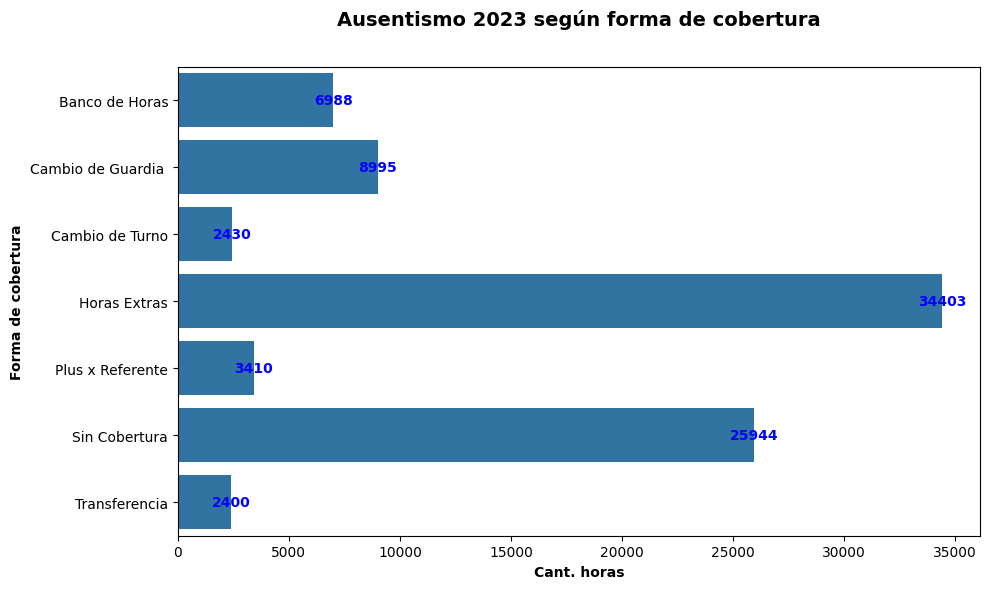

In [20]:
# Genero el grafico

plt.figure(figsize=(10,6))
sns.barplot(y = 'FormaDeCobertura', x = 'Cant_Hs', data = df_cob_grouped)
plt.title("Ausentismo 2023 según forma de cobertura", 
             fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Cant. horas', fontsize = 10, fontweight = 'bold')
plt.ylabel('Forma de cobertura', fontsize = 10, fontweight = 'bold')
ax = plt.gca() #obtengo el eje
for p in ax.patches: #ax.patches obtengo las barras
    valores = p.get_width() #obtengo el valor de la barra
    ax.text(valores + 5, p.get_y() + p.get_height()/2, f'{valores:.0f}', #agrega texto (valores) al grafico y posiciono los valores verticalmente en el centro de la barra
            ha = 'center', va = 'center', fontsize = 10, fontweight = 'bold', color = 'blue')

plt.tight_layout() #ajuste de las dimensiones del grafico para una mejor visualizacion de los valores y etiquetas
plt.show()

##### **Descripcion del grafico:** La suma de todas las variables categoricas de "Forma de cobertura" representa el ausentismo total 2023. En el desglose de las horas computadas segun forma de cobertura se observa que las dos variables con mayor cantidad de horas fueron "Horas Extras" y "Sin Cobertura". Si bien seria interesante cruzar los datos con los operativos de produccion (dias cama ocupados y complejidad de pacientes), podria observarse una necesidad de cubrir las ausencias, lo que sugeriria un nivel optimo de ocupacion de cama, junto con una optimizacion en el uso de recursos humanos por la significativa cantidad de horas no cubiertas. 
<br>

### **Segundo grafico:** Barplot de ausentismo comparado en horas vs count colaboradores 2023

##### La carga horaria contractual por jornada laboral en cada turno es la siguiente:

##### Turnos diurnos (TM y TT): 7 horas
##### Turnos nocturnos (TNA y TNB): 10 horas
##### Turno SDF: 14 horas

##### Dado que en en df_aus se observa que cada registro se computa un colaborador ausente, en el cual en la columna 'Cant. Hs' se computan las horas de ausencia de dicho colaborador, un .sum() del campo 'Cant. Hs' representara las horas totales, y un .count() la cantidad total de colaboradores ausentes.

##### **Se presenta la posicion consolidada de horas y colaboradores totales de ausentismo por turno en 2023**

In [21]:
# Joineo los dos df y creo uno nuevo con groupby con las categorías que necesito, sumando las horas totales para las categorías definidas
df_aus_merged = df_aus.merge(df_tur, on='TurnoID')
df_aus_grouped = df_aus_merged.groupby(['Turno', 'Mes'])['Cant_Hs'].sum().reset_index()

# Asigno la columna 'Turno' como categoría ordenada antes de hacer el groupby
orden_turnos = ['TM', 'TT', 'TNA', 'TNB', 'SDF']
df_aus_merged['Turno'] = pd.Categorical(df_aus_merged['Turno'], categories=orden_turnos, ordered=True)

# Posicion consolidada de ausentismo total por turno, en horas
df_aus_grouped1 = df_aus_merged.groupby(['Turno'])['Cant_Hs'].sum().reset_index()

# Posicion consolidada de ausentismo total por turno, en horas
df_aus_grouped2 = df_aus_merged.groupby(['Turno'])['Cant_Hs'].count().reset_index()

# Muestra el DataFrame con los turnos correctamente ordenados
print(df_aus_grouped1)
print()
print(df_aus_grouped2)


  Turno  Cant_Hs
0    TM  17486.0
1    TT  16198.5
2   TNA  16191.0
3   TNB  15397.5
4   SDF  19296.5

  Turno  Cant_Hs
0    TM     2642
1    TT     2410
2   TNA     1817
3   TNB     1617
4   SDF     1801


C:\Users\matis\AppData\Local\Temp\ipykernel_27288\1378001651.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aus_grouped1 = df_aus_merged.groupby(['Turno'])['Cant_Hs'].sum().reset_index()
C:\Users\matis\AppData\Local\Temp\ipykernel_27288\1378001651.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_aus_grouped2 = df_aus_merged.groupby(['Turno'])['Cant_Hs'].count().reset_index()


C:\Users\matis\AppData\Local\Temp\ipykernel_27288\2317081318.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Turno', y='Cant_Hs', data=df_aus_grouped1, palette='viridis')
C:\Users\matis\AppData\Local\Temp\ipykernel_27288\2317081318.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], x='Turno', data=df_aus_merged, palette='viridis')


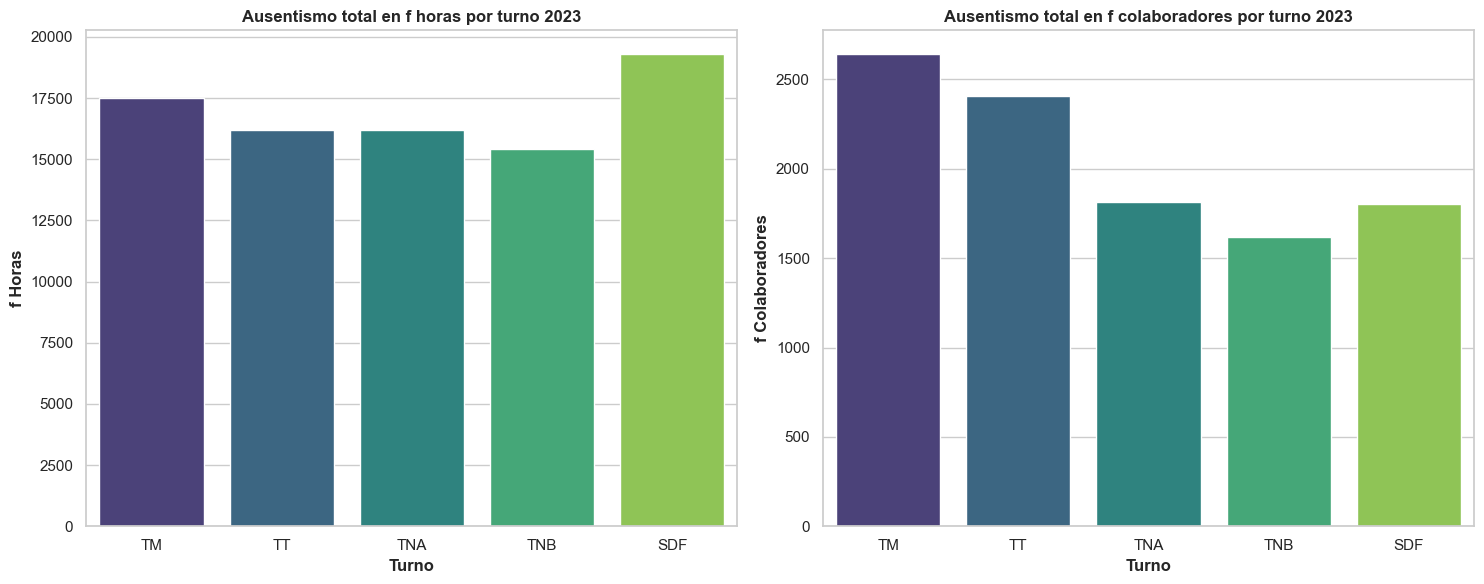

In [22]:
#Armo el esquema del grafico 2 columnas x 1 fila en subplots
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Primer gráfico: Ausentismo total en f horas por turno 2023
sns.barplot(ax=axes[0], x='Turno', y='Cant_Hs', data=df_aus_grouped1, palette='viridis')
axes[0].set_title('Ausentismo total en f horas por turno 2023', fontweight='bold')
axes[0].set_xlabel('Turno', fontweight='bold')
axes[0].set_ylabel('f Horas', fontweight='bold')

# Segundo gráfico: Ausentismo total en f colaboradores por turno 2023
sns.countplot(ax=axes[1], x='Turno', data=df_aus_merged, palette='viridis')
axes[1].set_title('Ausentismo total en f colaboradores por turno 2023', fontweight='bold')
axes[1].set_xlabel('Turno', fontweight = 'bold')
axes[1].set_ylabel('f Colaboradores', fontweight = 'bold')

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

##### **Descripcion del grafico:** el barplot de la izquierda muestra que el turno SDF es el que mas horas de ausentismo ha acumulado en el 2023, seguido por el TM. Lo interesante como insight es compararlo con el barplot de la derecha, donde se observa que el TM fue el turno que mas registros de colaboradores ausentes o parcialmente ausentes ha tenido, seguido por el TT. Esto tiene cierta coherencia dado que, en una semana sin feriados como referencia, mientras TM y TT trabajan 5 dias a la semana (35 horas semanales) SDF trabaja 2 dias a la semana (28 horas semanales). Los turnos nocturnos han mostrado un comportamiento similar, TNA mostro levemente mayor ausencia tanto en horas como en colaboradores. SDF muestra la mayor cantidad de horas de ausencia, pero baja cantidad relativa de colaboradores ausentes. 
<br>

### **Tercer gráfico: barplot de ausentismo mensual, bivariado según turno (hue)**

#### Muestra el evolutivo mensual de las horas de ausentismo generadas según turno

In [23]:
#Muestro df de ausentismo

df_aus.head()

,ID,Año,Mes,Fecha,Día,Legajo,CategoriaID,TurnoID,MotivoID,Cant_Hs
0,1,2023,Enero,2,Lunes,7508,1,1,12,7.0
1,2,2023,Enero,2,Lunes,8783,1,1,12,7.0
2,3,2023,Enero,2,Lunes,9305,1,1,12,7.0
3,4,2023,Enero,2,Lunes,11546,1,1,12,7.0
4,5,2023,Enero,2,Lunes,11227,1,1,3,7.0


In [24]:
#muestro df de las categorías de turno
df_tur

,TurnoID,Turno
0,1,TM
1,2,TT
2,3,TNA
3,4,TNB
4,5,SDF


In [25]:
#Creo lista con los meses ordenados por calendario (ordinal)
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

#Asigno la lista ordinal orden_meses a la categoría 'Mes' del df_aus
df_aus_grouped['Mes'] = pd.Categorical(df_aus_grouped['Mes'], categories=orden_meses, ordered=True)

#Asigno la lista ordinal orden_turnos a la categoría 'Turno' del df_aus
df_aus_grouped['Turno'] = pd.Categorical(df_aus_grouped['Turno'], categories=orden_turnos, ordered=True)

#Asigno variables para crear los filtros para obtener las horas totales según cada turno
filtroTM = df_aus_merged['Turno'] == 'TM'
filtroTT = df_aus_merged['Turno'] == 'TT'
filtroTNA = df_aus_merged['Turno'] == 'TNA'
filtroTNB = df_aus_merged['Turno'] == 'TNB'
filtroSDF = df_aus_merged['Turno'] == 'SDF'

print(df_aus_grouped.head())

  Turno        Mes  Cant_Hs
0   SDF      Abril   1717.0
1   SDF     Agosto   1038.5
2   SDF  Diciembre   2048.5
3   SDF      Enero   1464.0
4   SDF    Febrero   1961.0


In [26]:
#Filtro con .loc para obtener dataframes que pueda manipular para el gráfico
df_aus_TM = df_aus_merged.loc[filtroTM,:]
df_aus_TT = df_aus_merged.loc[filtroTT,:]
df_aus_TNA = df_aus_merged.loc[filtroTNA,:]
df_aus_TNB = df_aus_merged.loc[filtroTNB,:]
df_aus_SDF = df_aus_merged.loc[filtroSDF,:]

#Creo los valores de las medias mensuales de cada turno, que luego usaré como lineas horizontales
suma_hs_TM = df_aus_TM['Cant_Hs'].sum()
media_mensual_TM = suma_hs_TM / 12

suma_hs_TT = df_aus_TT['Cant_Hs'].sum()
media_mensual_TT = suma_hs_TT / 12

suma_hs_TNA = df_aus_TNA['Cant_Hs'].sum()
media_mensual_TNA = suma_hs_TNA / 12

suma_hs_TNB = df_aus_TNB['Cant_Hs'].sum()
media_mensual_TNB = suma_hs_TNB / 12

suma_hs_SDF = df_aus_SDF['Cant_Hs'].sum()
media_mensual_SDF = suma_hs_SDF / 12


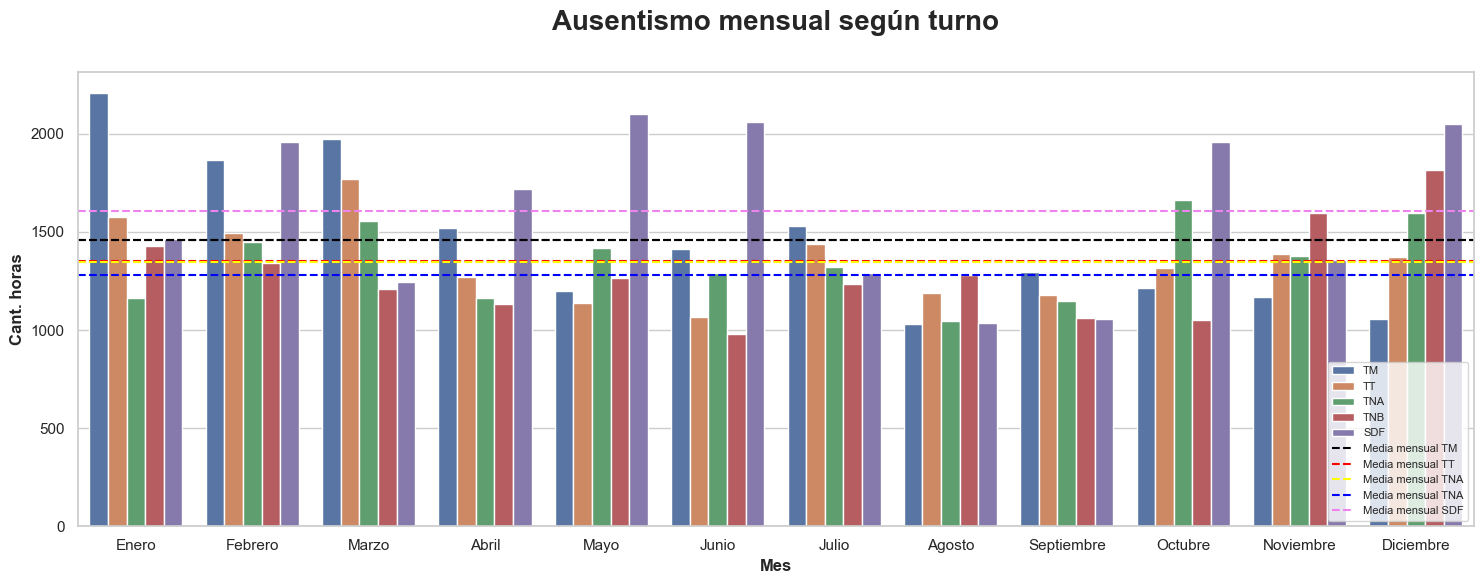

In [27]:
#Creo el gráfico

plt.figure(figsize=(15,6))
sns.barplot(y = 'Cant_Hs', x = 'Mes', hue= 'Turno', data = df_aus_grouped)
plt.title('Ausentismo mensual según turno',
          fontsize = 20, fontweight = 'bold', pad= 30)

plt.ylabel('Cant. horas', fontweight = 'bold')
plt.xlabel('Mes', fontweight = 'bold')

plt.axhline(y = media_mensual_TM,
            color = 'black',
            linestyle = '--')

plt.axhline(y = media_mensual_TM,
            color = 'black',
            linestyle = '--',
            label = 'Media mensual TM')

plt.axhline(y = media_mensual_TT,
            color = 'red',
            linestyle = '--',
            label = 'Media mensual TT')

plt.axhline(y = media_mensual_TNA,
            color = 'yellow',
            linestyle = '--',
            label = 'Media mensual TNA')

plt.axhline(y = media_mensual_TNB,
            color = 'blue',
            linestyle = '--',
            label = 'Media mensual TNA')

plt.axhline(y = media_mensual_SDF,
            color = 'violet',
            linestyle = '--',
            label = 'Media mensual SDF')

plt.legend(loc='lower right',
           fontsize = 8)

plt.tight_layout()
plt.show()

##### **Descripcion del grafico:** es un análisis bivariado en el cual se observa la frecuencia de horas de ausencia mensual y por turno, agregando también la media mensual de cada turno. De este gráfico se pueden observar varios puntos interesantes, a saber: 1) Desde octubre a marzo inclusive, se puede observar una tendencia creciente de ausentismo en todos los turnos, el cual se podría relacionar con las licencias por vacaciones (LAR) otorgadas. Enero y febrero son los meses con mayor ausentismo, tendría relación con las LAR.; 2) TM registra el mayor ausentismo en los meses de enero a marzo, mostrando en los demás meses un patrón estable de onda; 3) en términos relativos, SDF muestra un comportamiento diferente y con mayor oscilación, salvo en los meses de julio a septiembre y noviembre que se asemeja a los demás turnos. 4) Se observa una oscilación significativa entre todos los turnos, lo cual sugiere que unos turnos enfrentan mayor horas de ausentismo respecto a otros. TM y SDF son los turnos con mayor horas de ausentismo, aunque mientras TM concentra sus picos de ausencia en los meses de enero a marzo, SDF sostiene picos de ausencia con patrón de onda en los meses de octubre a junio. 5) Se observa una estacionalidad de baja de ausencias en todos los turnos en los meses de julio a septiembre. 6) Las líneas de media mensual indican que el ausentismo varía no solo entre turnos, sino que también se mantiene en un rango específico para cada turno. Asi, el promedio de ausentismo de SDF es consistentemente más alto que el de otros turnos, mientras que TNA es el más bajo. A partir del alto ausentismo en SDF, se identifica una oportunidad de mejora para analizar las condiciones laborales, pesquisar colaboradores con mayor tendencia a ausentarse, revisar estrategias de bienestar y retención, y analizar los motivos de ausencia y la cantidad de días de licencia por vacaciones a otorgar, dado que esto es una variable en función de la antiguedad de cada colaborador en la organización. 



### **Cuarto Gráfico: Radar Horas extras según turno**

In [28]:
#Creo el df joineando los ID para obtener los registros con la categoría del turno donde se generó cada ausente, y las horas contratadas filtradas por horas extras
ID_registros_aus = df_aus_merged[['ID', 'Turno']]
ID_registros_cob = df_cob_merged[['ID', 'FormaDeCobertura', 'Cant_Hs']]
ID_merged = ID_registros_aus.merge(ID_registros_cob, on= 'ID')
filtro_extras = ID_merged['FormaDeCobertura'] == 'Horas Extras'
df_extras = ID_merged.loc[filtro_extras,:]
df_extras.head()

,ID,Turno,FormaDeCobertura,Cant_Hs
4,5,TM,Horas Extras,7.0
14,15,TM,Horas Extras,7.0
15,16,TM,Horas Extras,7.0
21,22,TM,Horas Extras,7.0
22,23,TM,Horas Extras,7.0


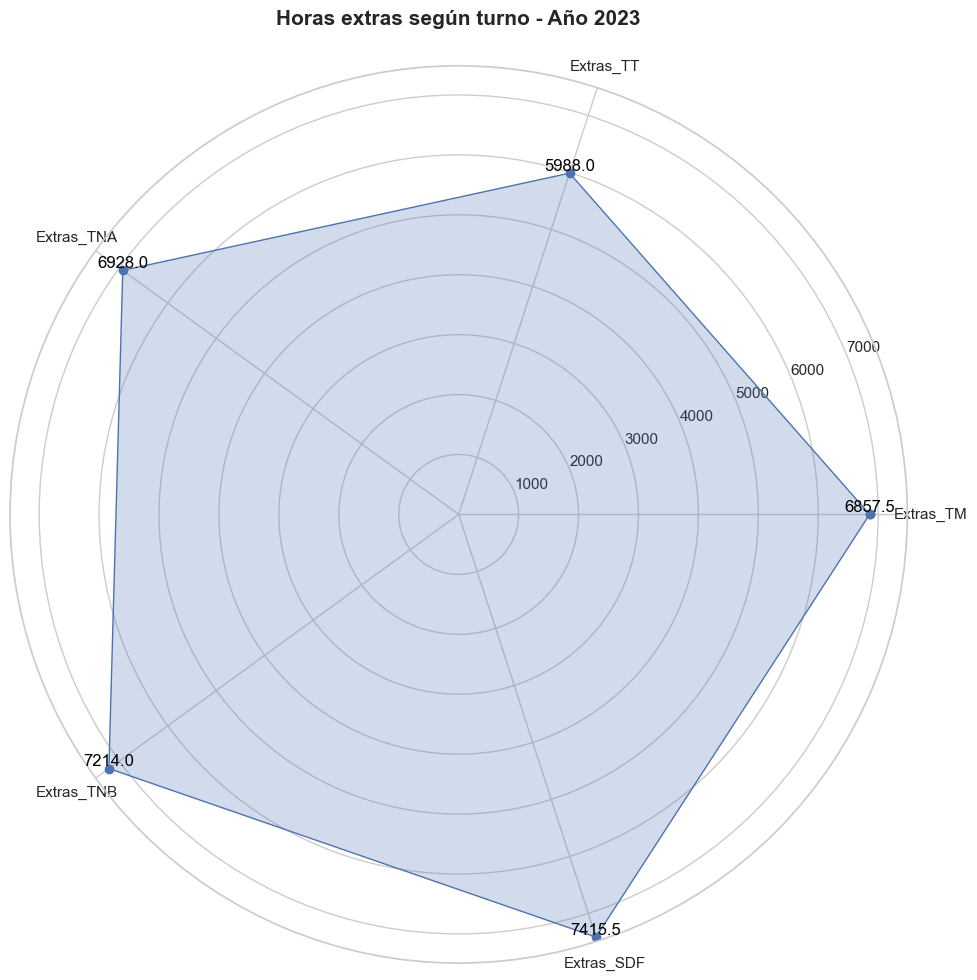

In [29]:
# Defino las categorías
categorias = ['Extras_TM', 'Extras_TT', 'Extras_TNA', 'Extras_TNB', 'Extras_SDF']

# Filtro y calculo los totales por turno
TMfiltro = df_extras['Turno'] == 'TM'
Extras_TM = df_extras.loc[TMfiltro, 'Cant_Hs'].sum()

TTfiltro = df_extras['Turno'] == 'TT'
Extras_TT = df_extras.loc[TTfiltro, 'Cant_Hs'].sum()

TNAfiltro = df_extras['Turno'] == 'TNA'
Extras_TNA = df_extras.loc[TNAfiltro, 'Cant_Hs'].sum()

TNBfiltro = df_extras['Turno'] == 'TNB'
Extras_TNB = df_extras.loc[TNBfiltro, 'Cant_Hs'].sum()

SDFfiltro = df_extras['Turno'] == 'SDF'
Extras_SDF = df_extras.loc[SDFfiltro, 'Cant_Hs'].sum()

# genero los valores
valores = [Extras_TM, Extras_TT, Extras_TNA, Extras_TNB, Extras_SDF]

# Creo los ángulos del radar
n_categorias = len(categorias)
angulos = np.linspace(0, 2 * np.pi, n_categorias, endpoint=False).tolist()
angulos += angulos[:1]  # cerrar el gráfico

# Agrego el primer valor al final para cerrar el gráfico
valores += valores[:1]

# Creo el gráfico radar
radar = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Dibujo los datos
ax.plot(angulos, valores, 'o-', linewidth=1)
ax.fill(angulos, valores, alpha=0.25)

# Personalización de los ángulos y etiquetas en el eje radial
ax.set_xticks(angulos[:-1])
ax.set_xticklabels(categorias)

# Agrego los valores en cada punto de las variables en el gráfico
for i, valor in enumerate(valores[:-1]):  # Excluir el último valor repetido
    angulo = angulos[i]
    ax.text(angulo, valor + 0.3, str(valor), color='black', size=12, 
            horizontalalignment='center', verticalalignment='bottom')

plt.title('Horas extras según turno - Año 2023', 
          fontsize=15, fontweight='bold', pad=30)

plt.tight_layout()
plt.show()


##### **Descripcion del grafico:** En el año 2023, el turno tarde mostró la menor cantidad de horas extras contratadas. Los demás turnos alcanzaron una cantidad de horas extras contratadas similares, con un rango máximo entre ellos de 558 hs.

### **Quinto gráfico: Barras apiladas de cantidad de colaboradores según región geográfica por turno**

In [30]:
#Nomina por localidad y turno
df_loc_merged = df_nom.merge(df_loc, on='LocalidadID')
df_loc_merged = df_loc_merged.merge(df_tur, on='TurnoID')

#Asigno la lista ordinal orden_turnos a la categoría 'Turno' del df_aus
df_loc_merged['Turno'] = pd.Categorical(df_loc_merged['Turno'], categories=orden_turnos, ordered=True)

df_loc_merged = df_loc_merged.groupby(['Turno', 'Zona'])['Zona'].count().reset_index(name='Total')
df_loc_merged

C:\Users\matis\AppData\Local\Temp\ipykernel_27288\2241365204.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_loc_merged = df_loc_merged.groupby(['Turno', 'Zona'])['Zona'].count().reset_index(name='Total')


,Turno,Zona,Total
0,TM,Centro,18
1,TM,Norte,2
2,TM,Norte-Oeste,3
3,TM,Oeste,7
4,TM,Sur,18
5,TM,Sur-Oeste,3
6,TT,Centro,16
7,TT,Norte,4
8,TT,Norte-Oeste,3
9,TT,Oeste,12


C:\Users\matis\AppData\Local\Temp\ipykernel_27288\150463090.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = df_loc_merged.pivot_table(index='Zona', columns='Turno', values='Total', aggfunc='sum')


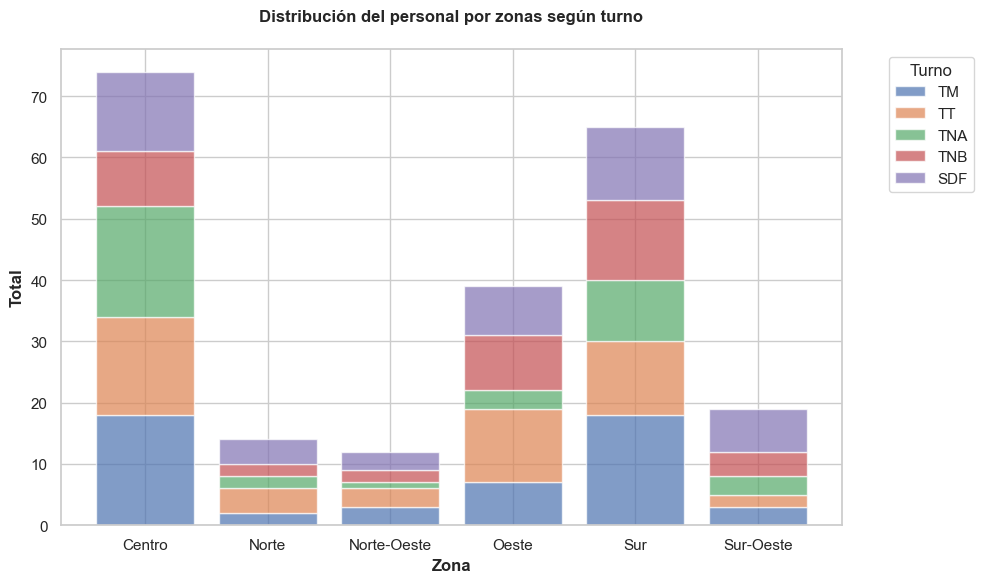

In [31]:
# Creo la figura
plt.figure(figsize=(10, 6))

# Agrupo y pivoteo para generar las barras apiladas. 'Zona' en el eje x, apilo por 'Turno', los valores serán de la columna 'Total', por suma
df_pivot = df_loc_merged.pivot_table(index='Zona', columns='Turno', values='Total', aggfunc='sum')

# Dibujo las barras apiladas
bottom_values = None
for turno in df_pivot.columns:
    plt.bar(df_pivot.index, df_pivot[turno], bottom=bottom_values, label=turno, alpha = 0.7)
    bottom_values = (df_pivot[turno] if bottom_values is None else bottom_values + df_pivot[turno])

# Edicion del gráfico
plt.title('Distribución del personal por zonas según turno', fontweight='bold', pad=20)
plt.ylabel('Total', fontweight='bold')
plt.xlabel('Zona', fontweight='bold')
plt.legend(title='Turno', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


##### **Descripición del gráfico:** del servicio de Internación General, la mayoría se concentra en la zona Centro (Capital Federal) y zona sur (entre las dos zonas cubren cerca de 2/3 del personal), seguido de zona Oeste. A su vez, quitando la zona centro, la mayor parte se concentra en la mitad geográfica centro - sur (zona oeste + zona sur + zona sur-oeste). Dificultades de transporte o acceso vial en esta zona impactará más significativamente en la presencialidad del personal.  

C:\Users\matis\AppData\Local\Temp\ipykernel_27288\2200209490.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = df_loc_merged.pivot_table(index='Turno', columns='Zona', values='Total', aggfunc='sum')


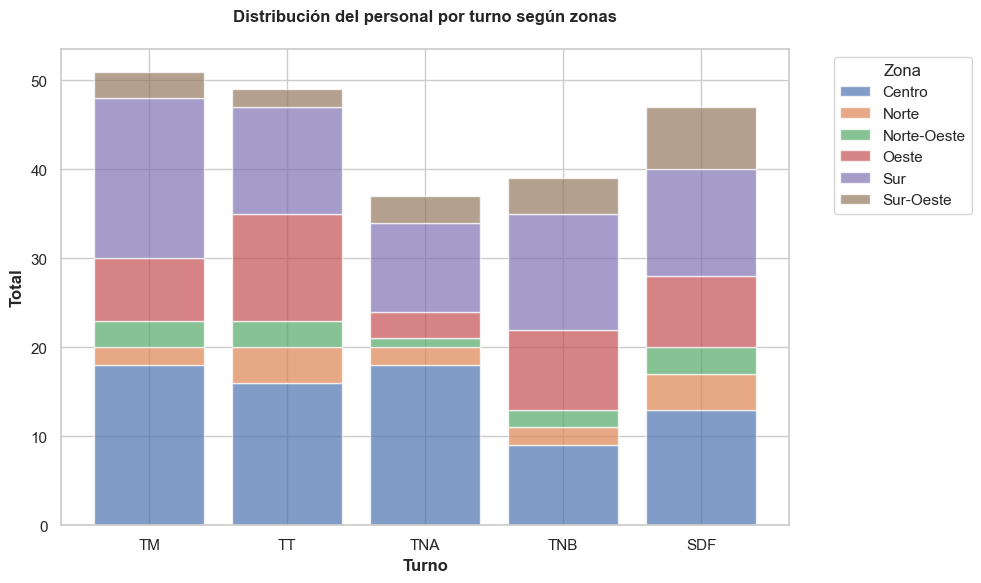

In [32]:
# Creo la figura
sns.set_style(style='whitegrid')
plt.figure(figsize=(10, 6))

# Agrupo y pivoteo para generar las barras apiladas. 'Zona' en el eje x, apilo por 'Turno', los valores serán de la columna 'Total', por suma
df_pivot = df_loc_merged.pivot_table(index='Turno', columns='Zona', values='Total', aggfunc='sum')

# Dibujo las barras apiladas
bottom_values = None
for zona in df_pivot.columns:
    plt.bar(df_pivot.index, df_pivot[zona], bottom=bottom_values, label=zona, alpha = 0.7)
    bottom_values = (df_pivot[zona] if bottom_values is None else bottom_values + df_pivot[zona])

# Edicion del gráfico
plt.title('Distribución del personal por turno según zonas', fontweight='bold', pad=20)
plt.ylabel('Total', fontweight='bold')
plt.xlabel('Turno', fontweight='bold')
plt.legend(title='Zona', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

##### **Descripción del gráfico:** TM cuenta con mayor presencia de personal en zona sur y centro. TT cuenta con mayor presencia en las zonas centro, oeste y sur. TNA la mayor presencia la tiene en zona centro, seguida de zona sur (entre estas dos zonas cubren unos 2/3 del personal). TNB cuenta con mayor presencia en zona sur, seguida por zona oeste y en tercer lugar zona centro. SDF cuenta con mayor presencia en zona sur, centro, oeste y sur-oeste. Conocer esta información por turno es importante para planificar la logística de transporte del personal ante dificultades relacionadas con interrupciones del transporte público o cortes de accesos. 

In [33]:
# Renombrar columnas para que coincidan
df_nom.rename(columns={'LEGAJO': 'Legajo'}, inplace=True)

# Unir tb_ausentismo con tb_nomina en 'Legajo'
df_aus_loc = df_aus.merge(df_nom, on='Legajo')

# Unir el resultado con tb_localidades en 'LocalidadID'
df_aus_loc = df_aus_loc.merge(df_loc, left_on='LocalidadID', right_on='LocalidadID')

# Agrupar por localidad y calcular el promedio de horas de ausentismo
ausxloc = df_aus_loc.groupby('Zona')['Cant_Hs'].mean().reset_index()

# Mostrar el resultado
print(ausxloc)



          Zona   Cant_Hs
0       Centro  8.137670
1        Norte  8.313131
2  Norte-Oeste  7.614815
3        Oeste  8.158537
4          Sur  7.933320
5    Sur-Oeste  9.117105


C:\Users\matis\AppData\Local\Temp\ipykernel_27288\3194117148.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Zona', y='Cant_Hs', data=ausxloc, palette='viridis')


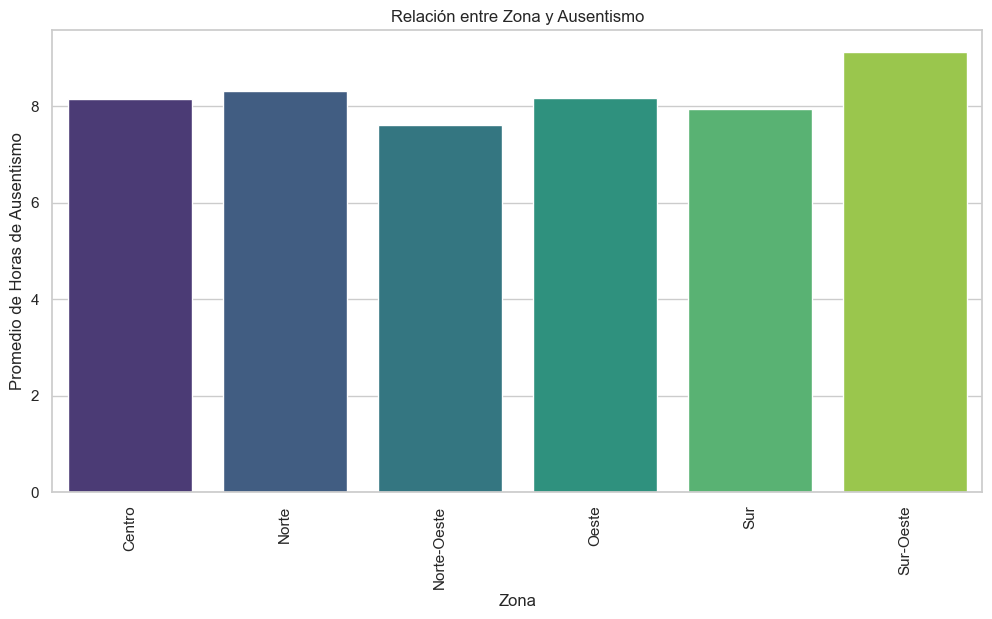

In [34]:
# Graficar la relación entre localidad y ausentismo
plt.figure(figsize=(12, 6))
sns.barplot(x='Zona', y='Cant_Hs', data=ausxloc, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Zona')
plt.ylabel('Promedio de Horas de Ausentismo')
plt.title('Relación entre Zona y Ausentismo')
plt.show()


##### **Descripción del gráfico:** zona Sur-Oeste alcanza un promedio más elevado respecto de las demás zonas, que cuentan con promedios similares de ausentismo. Es importante analizar los colaboradores que residen en zona Sur-Oeste, para determinar si se trata de un outlier relacionado con algún colaborador con alto ausentismo. 

### Matriz de confusión y correlación Cramer V

##### Para correlacionar variables categóricas, debo utilizar Cramer V y matriz de confusión. Es posible utilizar coeficiente de correlación de Pearson con variables Dummies, de esta manera numeralizo las variables categóricas en 0s y 1s.

In [35]:
# Preparo el df y selecciono las variables a correlacionar
df_aus_cob = df_aus.merge(df_cob, on='ID')
df_aus_cob = df_aus_cob[['ID', 'Mes', 'CategoriaID', 'TurnoID', 'FormaDeCoberturaID', 'Legajo_Reemplazo', 'Cant_Hs_y', 'TurnoID2']]
df_aus_cob.rename(columns={'Legajo_Reemplazo' : 'Legajo'}, inplace=True)
df_aus_cob.head()

,ID,Mes,CategoriaID,TurnoID,FormaDeCoberturaID,Legajo,Cant_Hs_y,TurnoID2
0,1,Enero,1,1,6,0,7.0,0
1,2,Enero,1,1,6,0,7.0,0
2,3,Enero,1,1,6,0,7.0,0
3,4,Enero,1,1,6,0,7.0,0
4,5,Enero,1,1,4,7942,7.0,4


In [36]:
legajo_locid = df_nom[['Legajo', 'LocalidadID']]
locid_zona = df_loc[['LocalidadID', 'Zona']]
df_cob_loc = df_aus_cob.merge(legajo_locid, on='Legajo', how='left')
df_cob_loc = df_cob_loc.merge(locid_zona, on='LocalidadID', how='left')
df_cob_loc = df_cob_loc.dropna(subset=['Zona'])
df_cob_loc.head()

,ID,Mes,CategoriaID,TurnoID,FormaDeCoberturaID,Legajo,Cant_Hs_y,TurnoID2,LocalidadID,Zona
4,5,Enero,1,1,4,7942,7.0,4,19.0,Centro
7,8,Enero,2,1,1,24754,4.5,2,47.0,Sur
13,14,Enero,2,1,1,25231,7.0,5,51.0,Oeste
14,15,Enero,1,1,4,15755,7.0,5,4.0,Centro
19,20,Enero,3,1,5,22765,7.0,1,66.0,Sur


In [37]:
import scipy.stats as stats

# Preparo la función para calcular Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [38]:
# Selecciono las variables categóricas
categorical_vars = ['Mes', 'CategoriaID', 'TurnoID', 'FormaDeCoberturaID', 'TurnoID2']

# Creo una matriz vacía para almacenar los valores de Cramér's V
cramers_v_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

# Calculo Cramér's V para cada par de variables categóricas
for var1 in categorical_vars:
    for var2 in categorical_vars:
        cramers_v_matrix.loc[var1, var2] = cramers_v(df_aus_cob[var1], df_aus_cob[var2])

# Convierto los valores a tipo float
cramers_v_matrix = cramers_v_matrix.astype(float)

print(cramers_v_matrix)

                         Mes  CategoriaID   TurnoID  FormaDeCoberturaID  \
Mes                 1.000000     0.047489  0.071407            0.070378   
CategoriaID         0.047489     1.000000  0.188955            0.539590   
TurnoID             0.071407     0.188955  1.000000            0.169812   
FormaDeCoberturaID  0.070378     0.539590  0.169812            1.000000   
TurnoID2            0.056585     0.242103  0.301129            0.477449   

                    TurnoID2  
Mes                 0.056585  
CategoriaID         0.242103  
TurnoID             0.301129  
FormaDeCoberturaID  0.477449  
TurnoID2            1.000000  


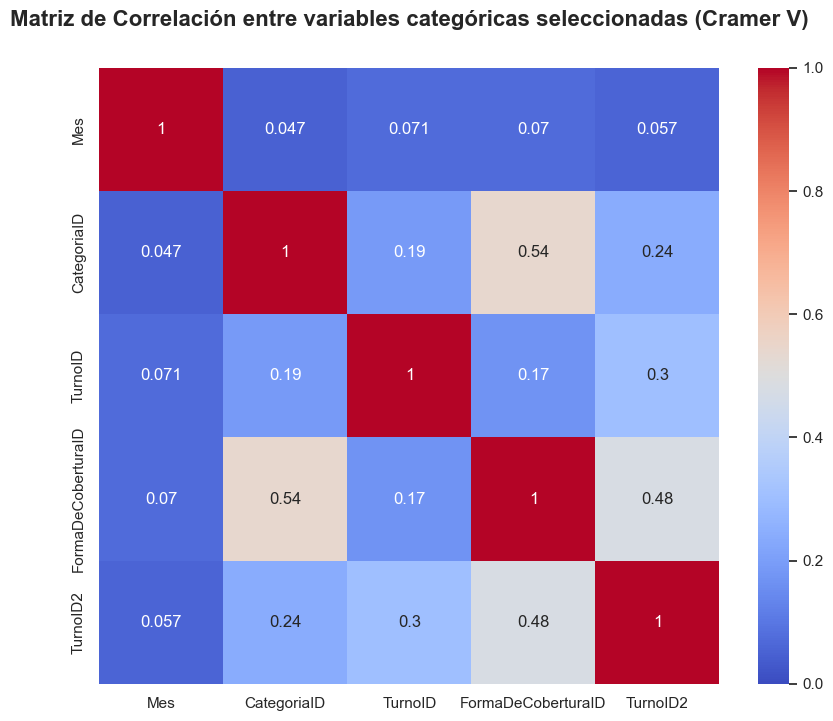

In [39]:
# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Matriz de Correlación entre variables categóricas seleccionadas (Cramer V)', fontweight = 'bold', pad=30, fontsize=16)
plt.show()


##### **Descripción del gráfico:** Se observa una correlación moderada entre la forma de cobertura y la categoría del profesional. Esto está relacionado con una tendencia del personal a realizar horas extras y que la mayoría del personal son enfermeros. En segundo lugar, se ve una correlación moderada entre la forma de cobertura y el turno. Esto es importante para identificar patrones de cobertura según el turno de origen del personal. 

## Modelo predictivo - Regresión lineal

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [41]:
#Transformo la variable categórica 'FormaDeCoberturaID' en dummy
df_cob['FormaDeCoberturaID'] = df_cob['FormaDeCoberturaID'].astype(str)
df_cob_cut = df_cob[['FormaDeCoberturaID', 'Cant_Hs']]
df_cob_cut = pd.get_dummies(df_cob_cut)
df_cob_cut.head()

,Cant_Hs,FormaDeCoberturaID_1,FormaDeCoberturaID_2,FormaDeCoberturaID_3,FormaDeCoberturaID_4,FormaDeCoberturaID_5,FormaDeCoberturaID_6,FormaDeCoberturaID_7
0,7.0,False,False,False,False,False,True,False
1,7.0,False,False,False,False,False,True,False
2,7.0,False,False,False,False,False,True,False
3,7.0,False,False,False,False,False,True,False
4,7.0,False,False,False,True,False,False,False


#### Validación de modelo predictivo 

In [42]:
#Selecciono las variables independientes y dependiente que deseo predecir. En este caso, deseo predecir las horas extras y banco de horas. 
# Variables independientes (Banco de horas y Horas Extras)
x_train = df_cob_cut[['FormaDeCoberturaID_1', 'FormaDeCoberturaID_4']]

# Variable dependiente (Cant_Hs)
y_train = df_cob_cut['Cant_Hs']

In [43]:
#Cargo el dataframe de prueba. En este caso está en otro archivo diferente al de entrenamiento
url = 'https://github.com/matisolica/Proyecto-final-DS1/raw/refs/heads/main/Matias%20Isolica%20Dataset%20-%20Ausentismo%20y%20coberturas%20Enfermeria%202024.xlsx'
dbexcel_test = pd.read_excel(url, sheet_name=None)

In [44]:
#printeo los nombres de las hojas del xlsx
print(dbexcel_test.keys())

dict_keys(['Tb_Coberturas', 'Tb_Ausentismo', 'Tb_Nomina', 'Tb_Motivos', 'Tb_FormaDeCobertura', 'Tb_Turnos', 'Tb_Servicios', 'Tb_Categorias', 'Tb_Localidades'])


In [45]:
#Transformo la variable categórica 'FormaDeCoberturaID' en dummy del df de prueba como hice con el df de entrenamiento.
df_test = dbexcel_test['Tb_Coberturas']
df_test = df_test[['FormaDeCoberturaID', 'Cant_Hs']]
df_test['FormaDeCoberturaID'] = df_test['FormaDeCoberturaID'].astype(str)
df_test = pd.get_dummies(df_test)
df_test.head()

C:\Users\matis\AppData\Local\Temp\ipykernel_27288\3613259174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['FormaDeCoberturaID'] = df_test['FormaDeCoberturaID'].astype(str)


,Cant_Hs,FormaDeCoberturaID_1,FormaDeCoberturaID_2,FormaDeCoberturaID_3,FormaDeCoberturaID_4,FormaDeCoberturaID_5,FormaDeCoberturaID_6,FormaDeCoberturaID_7
0,7.0,False,False,False,False,False,True,False
1,7.0,False,False,False,False,False,True,False
2,7.0,False,False,False,False,False,True,False
3,7.0,False,False,False,False,False,True,False
4,7.0,False,False,False,True,False,False,False


In [46]:
#Repito el proceso de selección de variables independientes y dependiente para el df de prueba
# Variables independientes (Banco de horas y Horas Extras)
x_test = df_test[['FormaDeCoberturaID_1', 'FormaDeCoberturaID_4']]

# Variable dependiente (Cant_Hs)
y_test = df_test['Cant_Hs']

### Entreno el modelo

In [47]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(x_train, y_train)


LinearRegression()

In [48]:
# Predecir los valores en el dataframe de prueba
y_pred = model.predict(x_test)

In [49]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadratico medio: {mse}')
print(f'Error cuadrático medio raíz: {rmse}')
print(f'R2 Score: {r2}')

Error cuadratico medio: 6.564860789915402
Error cuadrático medio raíz: 2.56219842906739
R2 Score: 0.022637667775536663


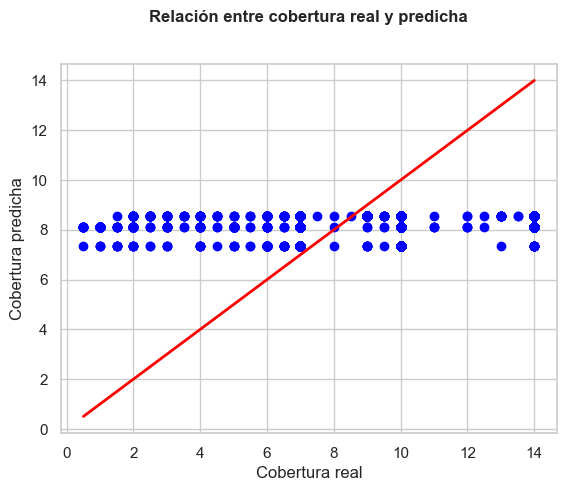

In [50]:
# Gráfico de predicciones vs valores reales
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Línea ideal
plt.xlabel('Cobertura real')
plt.ylabel('Cobertura predicha')
plt.title('Relación entre cobertura real y predicha', fontweight='bold', pad=30)
plt.show()

#### Análisis del Rendimiento sobre el Modelo

##### Error cuadrático medio (MSE): 6.56 Indica que hay errores significativos en las predicciones, con lo cual sugiere que los datos no se ajustan al modelo correctamente.

##### Error cuadrático medio raíz (RMSE): 2.56 Este valor indica que, en promedio, las predicciones del modelo se desvían de los valores reales en aproximadamente 2.56 horas.

#### Comparación con MSE y R2 Score
##### MSE: El MSE que obtuviste fue de 6.564860789915402. El RMSE es simplemente la raíz cuadrada de este valor, lo que da 2.56219842906739.
##### R2 Score: El R2 Score de 0.022637667775536663 indica que el modelo explica solo el 2.26% de la variabilidad en los datos. Esto sugiere que el modelo no está capturando bien la relación entre las variables independientes y la variable dependiente.

#### Conclusión
##### RMSE: Un RMSE de 2.56 indica que hay un error promedio de 2.56 unidades en las predicciones del modelo. Este valor debe ser interpretado en el contexto de la escala de la variable dependiente. Si la variable dependiente tiene un rango amplio, un RMSE de 2.56 puede ser aceptable. Sin embargo, si el rango es estrecho, este error puede ser significativo.

##### Finalmente, este modelo no explica la relación entre variables, o requiere de más variables.

### Pruebo nuevamente con Regresión lineal, pero múltiple

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Dividimos en variables independientes (X) y dependiente (y)
X = df_cob_loc[['CategoriaID', 'TurnoID2', 'FormaDeCoberturaID']]
y = df_cob_loc['Cant_Hs_y']

# Datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [57]:
def evaluar_modelo(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'Error cuadrático medio (MSE): {mse:.2f}')
    print(f'Error cuadrático medio raíz (RMSE): {rmse:.2f}')
    print(f'Coeficiente de determinación (R²): {r2:.2f}')
    return mse, rmse, r2

In [58]:
# Crear y entrenar el modelo de regresión lineal
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# Predecir y evaluar
y_pred_lr = modelo_lr.predict(X_test)
print("Resultados de Regresión Lineal:")
evaluar_modelo(y_test, y_pred_lr)


Resultados de Regresión Lineal:
Error cuadrático medio (MSE): 4.69
Error cuadrático medio raíz (RMSE): 2.17
Coeficiente de determinación (R²): 0.04


(4.690540993547333, 2.1657656829738836, 0.0411283381934161)

### Modelo predictivo Random Forest

In [59]:
# Crear y entrenar el modelo de Random Forest
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)

# Predecir y evaluar
y_pred_rf = modelo_rf.predict(X_test)
print("\nResultados de Random Forest:")
evaluar_modelo(y_test, y_pred_rf)



Resultados de Random Forest:
Error cuadrático medio (MSE): 3.87
Error cuadrático medio raíz (RMSE): 1.97
Coeficiente de determinación (R²): 0.21


(3.872710793070547, 1.9679204234598886, 0.2083146402608289)

### Modelo predictivo Gradient Boosting

In [60]:
# Crear y entrenar el modelo de Gradient Boosting
modelo_gb = GradientBoostingRegressor(random_state=42)
modelo_gb.fit(X_train, y_train)

# Predecir y evaluar
y_pred_gb = modelo_gb.predict(X_test)
print("\nResultados de Gradient Boosting:")
evaluar_modelo(y_test, y_pred_gb)



Resultados de Gradient Boosting:
Error cuadrático medio (MSE): 3.94
Error cuadrático medio raíz (RMSE): 1.98
Coeficiente de determinación (R²): 0.19


(3.939191267349862, 1.9847395968614778, 0.19472425848235375)

## Comparativa de los tres modelos predictivos utilizados

In [61]:
# Crear una tabla con los resultados
resultados = pd.DataFrame({
    "Modelo": ["Regresión Lineal", "Random Forest", "Gradient Boosting"],
    "MSE": [mean_squared_error(y_test, y_pred_lr),
            mean_squared_error(y_test, y_pred_rf),
            mean_squared_error(y_test, y_pred_gb)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_lr)),
             np.sqrt(mean_squared_error(y_test, y_pred_rf)),
             np.sqrt(mean_squared_error(y_test, y_pred_gb))],
    "R²": [r2_score(y_test, y_pred_lr),
           r2_score(y_test, y_pred_rf),
           r2_score(y_test, y_pred_gb)]
})

print(resultados)

              Modelo       MSE      RMSE        R²
0   Regresión Lineal  4.690541  2.165766  0.041128
1      Random Forest  3.872711  1.967920  0.208315
2  Gradient Boosting  3.939191  1.984740  0.194724


In [64]:
# Datos de los resultados
model_results = {
    'Modelo': ['Regresión Lineal', 'Random Forest', 'Gradient Boosting'],
    'MSE': [4.690541, 3.872711, 3.939191],
    'RMSE': [2.165766, 1.967920, 1.984740],
    'R2': [0.041128, 0.208315, 0.194724]
}

# Crear DataFrame
df_results = pd.DataFrame(model_results)

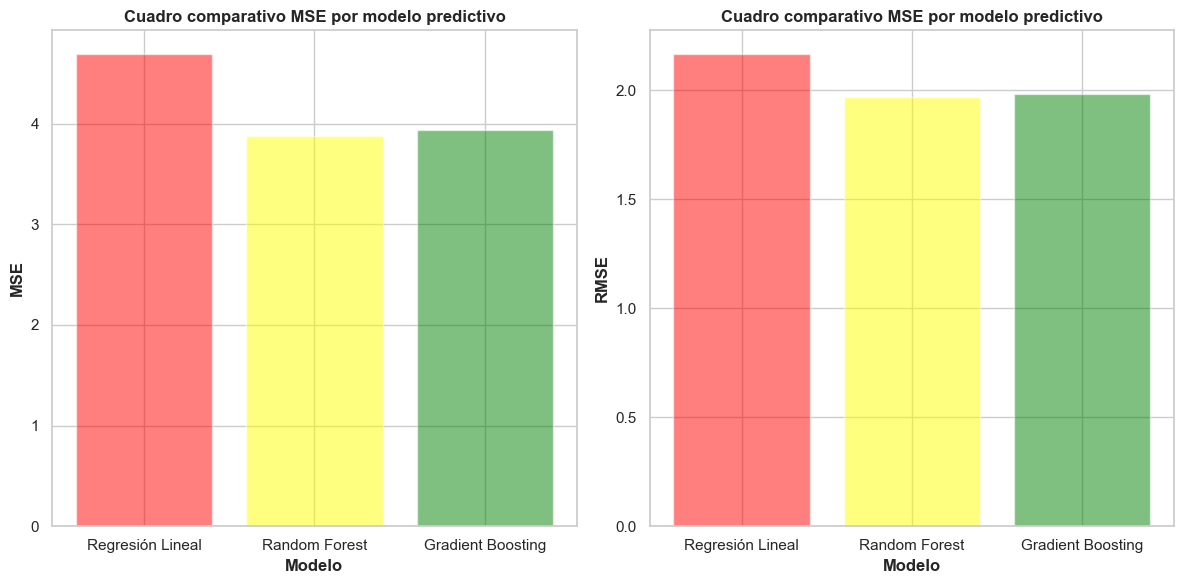

In [ ]:
# Gráfico x 2 MSE y RMSE
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de MSE
ax[0].bar(df_results['Modelo'], df_results['MSE'], color=['red', 'yellow', 'green'], alpha=0.5)
ax[0].set_title('Cuadro comparativo MSE por modelo predictivo', fontweight='bold')
ax[0].set_xlabel('Modelo', fontweight='bold')
ax[0].set_ylabel('MSE', fontweight='bold')

# Gráfico de RMSE
ax[1].bar(df_results['Modelo'], df_results['RMSE'], color=['red', 'yellow', 'green'], alpha=0.5)
ax[1].set_title('Cuadro comparativo MSE por modelo predictivo', fontweight='bold')
ax[1].set_xlabel('Modelo', fontweight='bold')
ax[1].set_ylabel('RMSE', fontweight='bold')

plt.tight_layout()
plt.show()


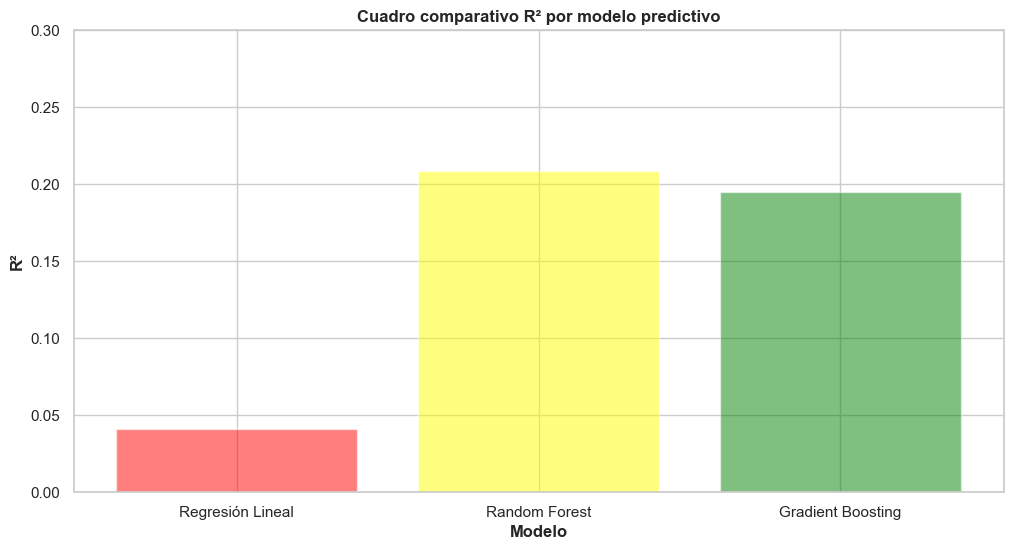

In [90]:
# Gráfico R²
plt.figure(figsize=(12, 6))
plt.bar(df_results['Modelo'], df_results['R2'], color=['red', 'yellow', 'green'], alpha=0.5)
plt.title('Cuadro comparativo R² por modelo predictivo', fontweight='bold')
plt.xlabel('Modelo', fontweight='bold')
plt.ylabel('R²', fontweight='bold')
plt.ylim(0, 0.3)  # Ajusta el rango del eje y para una mejor visualización comparada
plt.show()

### Conclusiones de los modelos predictivos utilizados

#####  Los modelos predictivos utilizados fueron Regresión lineal, Random Forest y Gradient Boosting. Random Forest mostró el mayor R² y el menor MSE y RMSE, lo que muestra un mayor rendimiento comparado en su modelo por una mejor explicación de la variabilidad de los datos (R²), menor error en sus predicciones (RMSE) y mayor precisión de la predicción (MSE), respecto a los otros dos modelos. Sin embargo, un R²=0.208315 indica que solo explica un 20,83% de la variabilidad de los datos. Es necesario un mayor análisis de los datos y la complejidad de la relación entre las variables, en especial por contar con varias variables categóricas. Es por ello que sería valioso revisar las variables independientes utilizadas. 
##### otros modelos como KNN (k-nearest-neighbor) podrían ser probados. 
##### Un ajuste de los hiperparámetros para los modelos Random Forest y Gradient Boosting podrían optimizar el rendimiento de dichos modelos. 
##### Es necesario evaluar posible sobreajuste de los modelos. 